In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# X-Plorers Team - Round 1

In [3]:
data_0 = pd.read_csv(filepath_or_buffer='../data/prices_round_1_day_-2.csv', sep=';')
data_1 = pd.read_csv(filepath_or_buffer='../data/prices_round_1_day_-1.csv', sep=';')
data_2 = pd.read_csv(filepath_or_buffer='../data/prices_round_1_day_0.csv', sep=';')
data = pd.concat([data_0, data_1, data_2], axis=0).reset_index(drop=True)

data_round2_0 = pd.read_csv(filepath_or_buffer='../data/prices_round_2_day_0.csv', sep=';')
data_round2_1 = pd.read_csv(filepath_or_buffer='../data/prices_round_2_day_-1.csv', sep=';')

In [6]:
data_round2_1.describe()


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.0
mean,500000.000000,1208.804745,1.400110,10.071043,-2.590221,3619.750103,85.621408,-1.0
std,288718.435504,22.073794,0.195987,1.397579,0.280179,548.985284,4.946191,0.0
min,0.000000,1146.750000,1.100000,8.500000,-3.600000,2471.594000,74.912860,-1.0
25%,250000.000000,1195.750000,1.200000,9.500000,-2.600000,3164.699200,82.979294,-1.0
50%,500000.000000,1209.750000,1.400000,9.500000,-2.600000,3666.911400,85.795170,-1.0
75%,750000.000000,1222.750000,1.500000,10.500000,-2.400000,4027.096400,88.584860,-1.0
max,1000000.000000,1257.250000,2.100000,16.000000,-2.000000,4513.986300,95.209755,-1.0


## Analysis of Starfruit

By looking at past data, we can see that Starfruit is **very volatile** asset with a lot of fluctuations.

We are gonna use the **Moving Cross Average** to trade this asset. To understand better what it is: https://www.savoirtrader.fr/fr/gagner-en-bourse/article/strategie-de-trading-moving-average-cross-i (article in french)

In [ ]:
data_starfruit = data.loc[data['product'] == 'STARFRUIT'].copy()
data_starfruit

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
59992,0,999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0


### Spread

In [ ]:
data_starfruit['spread'] = data_starfruit['bid_price_1'] - data_starfruit['ask_price_1']

In [ ]:
data_starfruit0['timestamp'].describe()

count     10000.000000
mean     499950.000000
std      288689.567991
min           0.000000
25%      249975.000000
50%      499950.000000
75%      749925.000000
max      999900.000000
Name: timestamp, dtype: float64

In [ ]:
data_starfruit2['spread'].describe()

KeyError: 'spread'

In [ ]:
data_starfruit2['mid_price'].plot()

In [ ]:
data_starfruit1['mid_price'].plot()

In [ ]:
data_starfruit0['mid_price'].plot()

In [ ]:
data_starfruit1_modified = data_starfruit1.copy()
data_starfruit0_modified = data_starfruit0.copy()

# Adjust the timestamps in the copies
data_starfruit1_modified['timestamp'] += 100
data_starfruit0_modified['timestamp'] += 999900*2

combined_data_starfruit = pd.concat([data_starfruit2, data_starfruit1_modified, data_starfruit0_modified])
combined_data_starfruit['mid_price'].plot()

data_starfruit1_modified['timestamp'].describe()

## Analysis of Amethysts

In [ ]:
data_amethysts = data.loc[data['product'] == 'AMETHYSTS'].copy()
data_amethysts.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
5,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0


**Bid Prices**: Range from 9,995 to 10,002 with a mean around 9,996.61, suggesting relatively stable but slightly fluctuating buying prices.

**Ask Prices**: Range from 9,998 to 10,005 with a mean around 10,003.39, indicating a similar stability in selling prices but slightly higher than buying prices, as expected

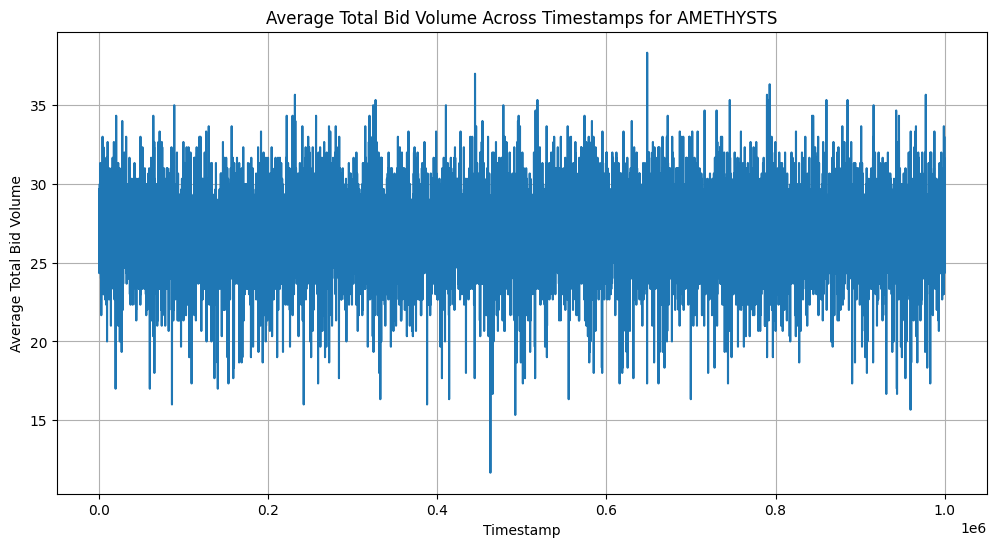

In [ ]:
# Calculate the total bid volume at each timestamp for each day
data_amethysts['total_bid_volume'] = data_amethysts[['bid_volume_1', 'bid_volume_2', 'bid_volume_3']].sum(axis=1)

# Group by timestamp and calculate the average total bid volume across all days
average_total_bid_volume_by_timestamp = data_amethysts.groupby('timestamp')['total_bid_volume'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_total_bid_volume_by_timestamp.plot()
plt.title('Average Total Bid Volume Across Timestamps for AMETHYSTS')
plt.xlabel('Timestamp')
plt.ylabel('Average Total Bid Volume')
plt.grid(True)
plt.show()
